In [1]:
'''
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
y_predict = kmeans.fit_predict(X)

1. K-Means clustering is an unsupervised learning algorithm. 
There is no labeled data for this clustering, unlike in supervised learning.

2. so there is no training of data,
so we havn't done 
SPLITTING into X, Y
TEST_TRAIN_SPLIT
FIT (training the data)

here we use --> FIT_PREDICT
==========================================================================================
# Plotting all clusters - (x,y)===[0,1], scale, color, label
kmeans.cluster_centers_[:, 0] # select all rows and 1st col
kmeans.cluster_centers_[:, 1] # select all rows and 2nd col
==========================================================================================
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot (range(1, 11), wcss_list) 


>plot is for drawing line
>range(1,11) is for plotting the 10 points of LIST wcss_list
>n_clusters=i --> making 1 to 10 clusters
>kmeans.fit(X) --> here it's fit, not predict fit
>to draw a line, we will use inertia provided by kmeans function --> wcss_list.append(kmeans.inertia_)
> we are doing this to find optimal number of clusters by observing the curve
>inertia_
'''

"\nfrom sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)\ny_predict = kmeans.fit_predict(X)\n\n1. K-Means clustering is an unsupervised learning algorithm. \nThere is no labeled data for this clustering, unlike in supervised learning.\n\n2. so there is no training of data,\nso we havn't done \nSPLITTING into X, Y\nTEST_TRAIN_SPLIT\nFIT (training the data)\n\nhere we use --> FIT_PREDICT\n==========================================================================================\n# Plotting all clusters - (x,y)===[0,1], scale, color, label\nkmeans.cluster_centers_[:, 0] # select all rows and 1st col\nkmeans.cluster_centers_[:, 1] # select all rows and 2nd col\n==========================================================================================\nwcss_list = []\nfor i in range(1, 11):\n    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)\n    kmeans.fit(X)\n    wcss_list.append(kmeans.inertia_)\n\nplt

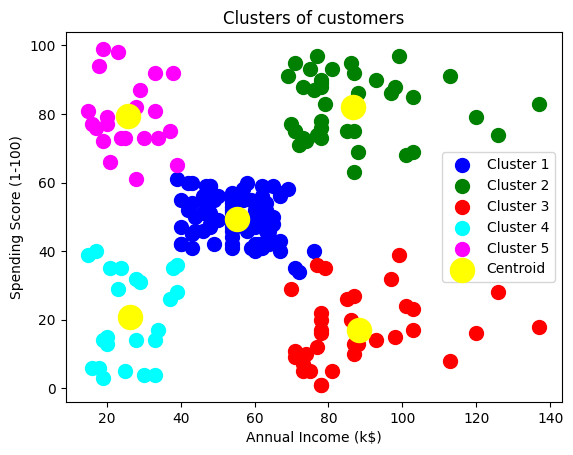

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

def plot_clusters(X, y_predict, kmeans):
    # s=thickness of point, c=color of point
    # Plotting all clusters - (x,y)===[0,1], scale, color, label
    plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100, c='blue',    label='Cluster 1')
    plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='green',   label='Cluster 2')
    plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='red',     label='Cluster 3')
    plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=100, c='cyan',    label='Cluster 4')
    plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=100, c='magenta', label='Cluster 5')

    plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
    
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend() # default, all labels clutster1 to cluster5, centroid, as mentioned in arguement
    
    plt.show()
    
    # plt.legend(['hello']) # prints only 1 label i.e. hello

# Data Pre-processing
dataset = pd.read_csv('Mall_Customers_data.csv')
X = dataset.iloc[:, [3, 4]].values 
# Annual Income (k$), Spending Score (1-100) -- last 2 attributes

# n_init=10, it's for removing the warnings
# Training the K-means algorithm on the dataset
kmeans    = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

# no labels (i.e. y_train, y_test), so no need to do fit_transform or transform, directly predicting "fit_predict(X)"
y_predict = kmeans.fit_predict(X)

# Visualizing the clusters
plot_clusters(X, y_predict, kmeans)


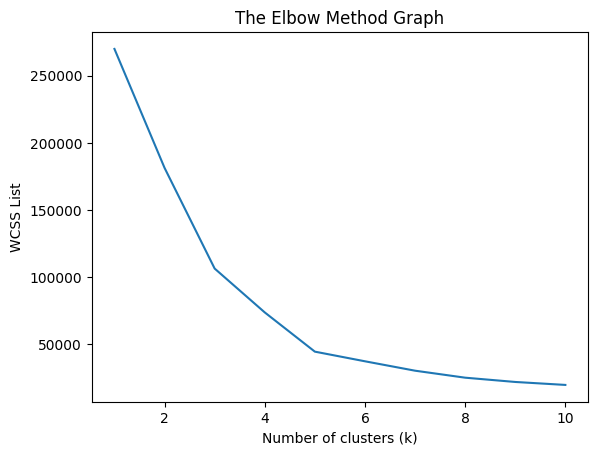

In [3]:
# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot (range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS List')
plt.show()

In [4]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
len(X), len(y_predict)

(200, 200)

In [6]:
y_predict

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,